<h1><center><font color=purple> Polynomial Regression </font></center></h1>

__Polynomial regression is a form of linear regression, by add power to independent variables to improve regression model.__

__In this note, I am going to use an dataset "Wages_Data_Polynomial.txt" to practise how to create a polynomial regression model and how to envaluate the model. The model targets to predict future earn by given age.__

                                                            -By Sophie on Jan 26, 2021

### <font color=purple>Step1: explore data</font>
*Before build regression model, I am going to brieftly detect the data I got and visualize it to see how the association between variables.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read/open the file
df = pd.read_csv("Wages_data_Polynomial.txt", sep=",")
df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [4]:
# Check row, column, missing value, datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1379 non-null   float64
 1   height  1379 non-null   float64
 2   sex     1379 non-null   object 
 3   race    1379 non-null   object 
 4   ed      1379 non-null   int64  
 5   age     1379 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 64.8+ KB


*__There is total 1379 entries, four numerical variables and two categorical variables, no missing values.__*

In [5]:
# Overview the statistical number in each numerical variables.
df.describe()

,earn,height,ed,age
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,32446.292622,66.592640,13.354605,45.328499
std,31257.070006,3.818108,2.438741,15.789715
min,-98.580489,57.340000,3.000000,22.000000
25%,10538.790721,63.720000,12.000000,33.000000
50%,26877.870178,66.050000,13.000000,42.000000
75%,44506.215336,69.315000,15.000000,55.000000
max,317949.127955,77.210000,18.000000,95.000000


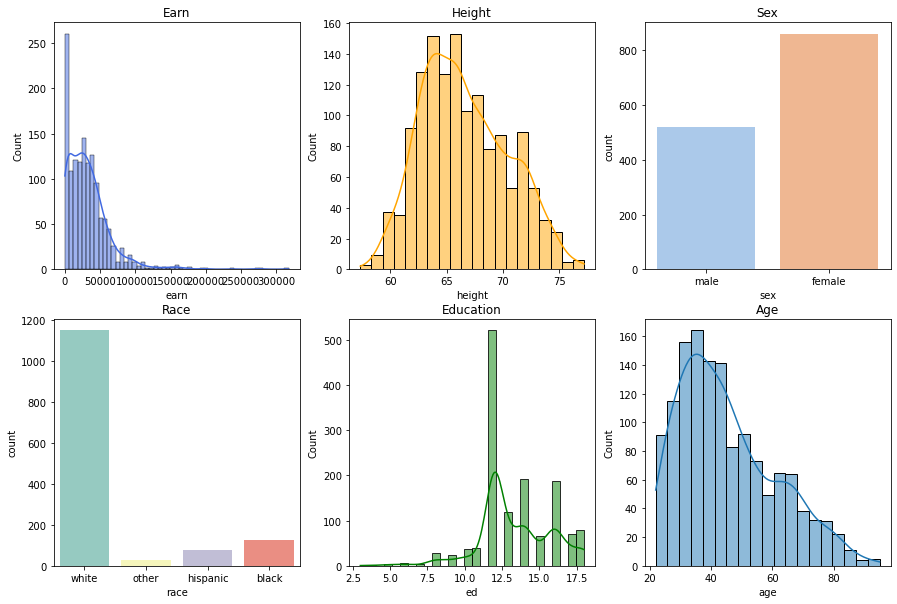

In [6]:
# Visualize each variable's value distribution

fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.histplot(ax=axes[0, 0], x=df['earn'], kde=True, color="royalblue")
axes[0, 0].set_title('Earn')

sns.histplot(ax=axes[0, 1], x=df['height'], kde=True, color="orange")
axes[0, 1].set_title('Height')

sns.countplot(ax=axes[0, 2], x=df['sex'], palette="pastel")
axes[0, 2].set_title('Sex')

sns.countplot(ax=axes[1, 0], x=df['race'], palette="Set3")
axes[1, 0].set_title('Race')

sns.histplot(ax=axes[1, 1], x=df['ed'], kde=True, color="green")
axes[1, 1].set_title('Education')

sns.histplot(ax=axes[1, 2], x=df['age'], kde=True)
axes[1, 2].set_title('Age')

plt.show()

In [7]:
# Check correlation between earn and other numerical variables.
df.corr()["earn"].sort_values()

age       0.074003
height    0.291600
ed        0.350374
earn      1.000000
Name: earn, dtype: float64

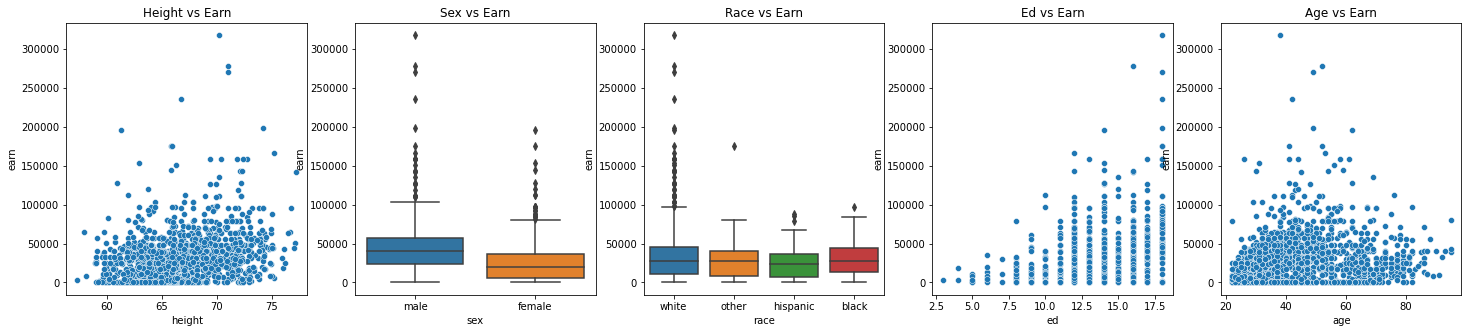

In [8]:
# Visualize the association between earn and other variables.
fig,axes = plt.subplots(nrows=1, ncols=5, figsize=(25,5))

sns.scatterplot(ax=axes[0], x=df['height'], y=df['earn'])
axes[0].set_title('Height vs Earn')

sns.boxplot(ax=axes[1], x=df['sex'], y=df['earn'])
axes[1].set_title('Sex vs Earn')

sns.boxplot(ax=axes[2], x=df['race'], y=df['earn'])
axes[2].set_title('Race vs Earn')

sns.scatterplot(ax=axes[3], x=df['ed'], y=df['earn'])
axes[3].set_title('Ed vs Earn')

sns.scatterplot(ax=axes[4], x=df['age'], y=df['earn'])
axes[4].set_title('Age vs Earn')

plt.show()

### <font color=purple> Step 2: Prepare data </font>

* __Fristly convert categorical data to dummies.__ 
* __Secondly seperate dataset to two sets, X is feature independent variables and y is dependent variable.__
* __To avoid underfitting or overfitting, we need find right degree(power). Here to find the better degree(power), I use the differrence between RMSE of train data and RMSE of test data.__

In [46]:
# Transfer object "sex" and "race" to dummy variables and save it to df_objects_dummies.
df_objects_dummies = pd.get_dummies(df.select_dtypes(include="object"), drop_first=True)

In [10]:
# get numerical columns and save it to df_numric.
df_numeric = df.select_dtypes(exclude="object")

In [11]:
# combine above two tables into one and save it df_final.
df_final = pd.concat([df_numeric, df_objects_dummies], axis=1)

In [30]:
# Seperate dataset to X (feature) and y (dependent variable).
# Here I droped the height, because the height ordering number can give a false weight to the model
X = df_final.drop(["earn", "height"], axis=1)
y = df["earn"]

In [31]:
# Import sklearn packages for polynomial regression model.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [32]:
# Create empty list for train_rmse_errors and test_rmse_errors 
train_rmse_errors = []
test_rmse_errors =[]

# Create a loop get the rmse when degree is 1, 2, 3, 4, 5, 6, 7, 8 and 9.
for d in range(1, 10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [33]:
#print out model's RMSE in train set when degree from 1 to 9.
train_rmse_errors

[26623.212458932157,
 25541.910892213815,
 24598.011369767773,
 24157.24145620603,
 23859.247918369805,
 23533.78638237083,
 23990.328217743143,
 23697.312898993667,
 24107.898514144097]

*__RMSE in train set goes down when degree goes up.__*

In [34]:
#print out model's RMSE in test set when degree from 1 to 9.
test_rmse_errors

[28425.69171565091,
 27683.074937675356,
 26874.556300236643,
 43546.17247626127,
 134301.63470262793,
 524980.146695763,
 1199981.4833397623,
 4360648.3814175185,
 8567162.425281717]

*__RMSE in test data go up after 3rd power__*

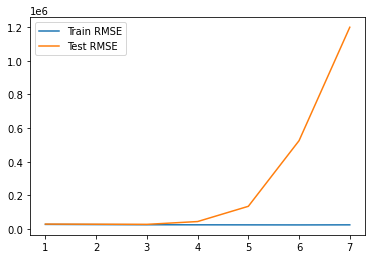

In [35]:
# Visualize the difference
plt.plot(range(1, 8), train_rmse_errors[:7], label="Train RMSE")
plt.plot(range(1, 8), test_rmse_errors[:7], label="Test RMSE")
plt.legend()
plt.show()

*__By looking at plot above, seems 4th power is just at the right point. To be sure, I want to zoom in and look the difference between 1 to 5 degree.__*

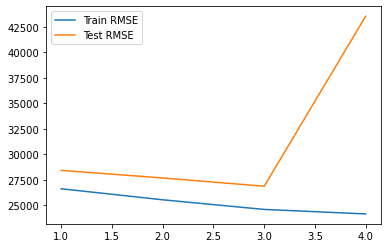

In [36]:
# Zoom in to see between 1 degree and 4 degree.
plt.plot(range(1, 5), train_rmse_errors[:4], label="Train RMSE")
plt.plot(range(1, 5), test_rmse_errors[:4], label="Test RMSE")
plt.legend()
plt.show()

*__By looking above plot, seems start from 3rd degree, RMSE in test data turns up. So I will choose the 3rd degree to create the model.__*

### <font color=purple> Step 3: Create model and test model </font>

In [37]:
# Create the converter with 3rd power and use it transform the feature X.
poly_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_converter.fit_transform(X)

In [38]:
# Split X and y to train set and test set on ratio 70/30.
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [39]:
# Create model and fit with train dataset.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Test the model with test dataset.
test_pred = model.predict(X_test)

### <font color=purple> Step 4: Evaluate model </font>

__Will check following scores:__
* __R_squared__
* __RAE(Mean absolute error)__
* __RMSE(Root mean square error)__

In [41]:
r2_score(y_test, test_pred)

0.2709958578628596

In [42]:
Mean = df['earn'].mean()
Mean

32446.292621754743

In [43]:
MAE = mean_absolute_error(y_test, test_pred)
MAE

17645.822771048042

In [44]:
RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
RMSE

26874.556300236643

### Conclution:  The model with R2 0.27, Mean absolut error 17645 and Root square error 26874 seems not good at all. Consider variable skewed distribution and possible associate between the variables, maybe should think about scale the data or try use other regression method.

#### End